In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
pip install PyMySQL

   ---------------------------------------- 0.0/45.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/45.3 kB ? eta -:--:--
   --------- ------------------------------ 10.2/45.3 kB ? eta -:--:--
   --------- ------------------------------ 10.2/45.3 kB ? eta -:--:--
   ------------------ --------------------- 20.5/45.3 kB 165.2 kB/s eta 0:00:01
   ------------------------------------ --- 41.0/45.3 kB 245.8 kB/s eta 0:00:01
   ---------------------------------------- 45.3/45.3 kB 248.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [19]:
import pymysql

In [20]:
# Connect to MySQL
connection = pymysql.connect(
    host='localhost',
    user='root',
    password='lokesh@123',
    database='crime_data'
)

In [21]:
# Query the data
query = "SELECT * FROM crime_data;"
df = pd.read_sql(query, connection)

C:\Users\HP\AppData\Local\Temp\ipykernel_27580\454243494.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


In [22]:
# Check data
df.head()

,DR_NO,Date_Rptd,DATE_OCC,AREA_NAME,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Premis_Desc,Status,Location,LAT,LON
0,10304468,01-08-2020,01-08-2020,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,SINGLE FAMILY DWELLING,AO,1100 W 39TH PL,34.01,-118.30
1,190101086,01-02-2020,01-01-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,700 S HILL ST,34.05,-118.25
2,191501505,01-01-2020,01-01-2020,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,5400 CORTEEN PL,34.17,-118.40
3,191921269,01-01-2020,01-01-2020,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,BEAUTY SUPPLY STORE,IC,14400 TITUS ST,34.22,-118.45
4,200100502,01-02-2020,01-02-2020,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,DEPARTMENT STORE,IC,700 S FIGUEROA ST,34.05,-118.26


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DR_NO        499 non-null    int64  
 1   Date_Rptd    499 non-null    object 
 2   DATE_OCC     499 non-null    object 
 3   AREA_NAME    499 non-null    object 
 4   Crm_Cd       499 non-null    int64  
 5   Crm_Cd_Desc  499 non-null    object 
 6   Vict_Age     499 non-null    int64  
 7   Vict_Sex     499 non-null    object 
 8   Premis_Desc  499 non-null    object 
 9   Status       499 non-null    object 
 10  Location     499 non-null    object 
 11  LAT          499 non-null    float64
 12  LON          499 non-null    float64
dtypes: float64(2), int64(3), object(8)
memory usage: 50.8+ KB


### Data Exploration

In [24]:
# Total number of records
print("Total Records:", len(df))

Total Records: 499


In [25]:
# Unique crime codes
print("Unique Crime Codes:", df['Crm_Cd'].nunique())

Unique Crime Codes: 42


In [26]:
# Missing values
print(df.isnull().sum())

DR_NO          0
Date_Rptd      0
DATE_OCC       0
AREA_NAME      0
Crm_Cd         0
Crm_Cd_Desc    0
Vict_Age       0
Vict_Sex       0
Premis_Desc    0
Status         0
Location       0
LAT            0
LON            0
dtype: int64


### Temporal Analysis

<Axes: title={'center': 'Crimes Over Months'}, xlabel='Month'>

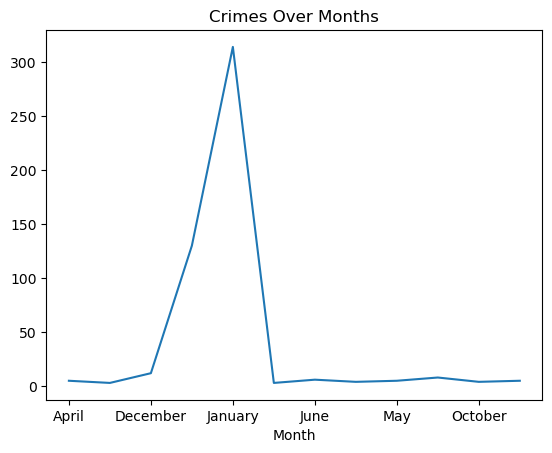

In [33]:
# Analyze crimes over time:
df['Date_Occurred'] = pd.to_datetime(df['DATE_OCC'])
df['Year'] = df['Date_Occurred'].dt.year
df['Month'] = df['Date_Occurred'].dt.month_name()

crime_trend = df.groupby('Month')['DR_NO'].count()
crime_trend.plot(kind='line', title='Crimes Over Months')


### Spatial Analysis (Hotspots)

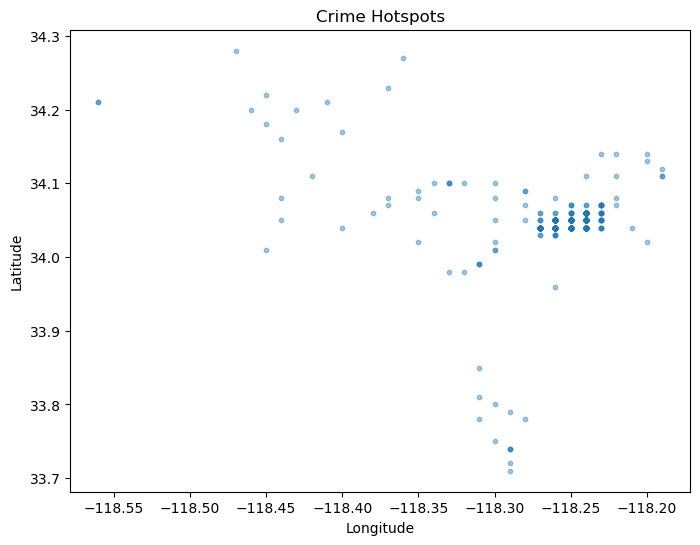

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(df['LON'], df['LAT'], alpha=0.4, s=10)
plt.title('Crime Hotspots')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Victim Demographics

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


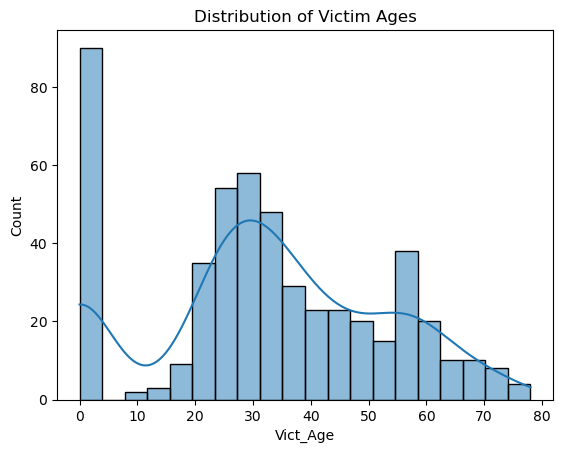

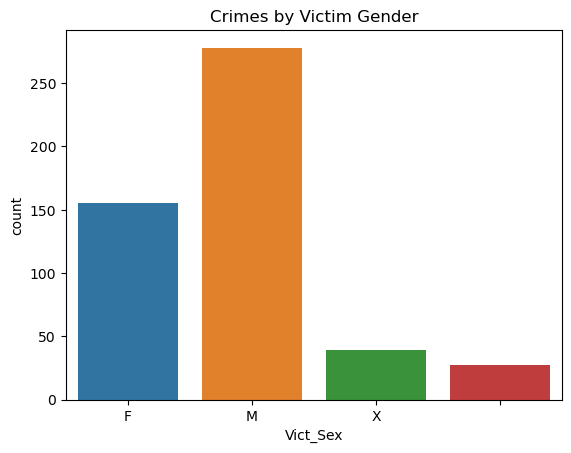

In [30]:
sns.histplot(df['Vict_Age'], bins=20, kde=True)
plt.title('Distribution of Victim Ages')
plt.show()

sns.countplot(x='Vict_Sex', data=df)
plt.title('Crimes by Victim Gender')
plt.show()

### Status Analysis

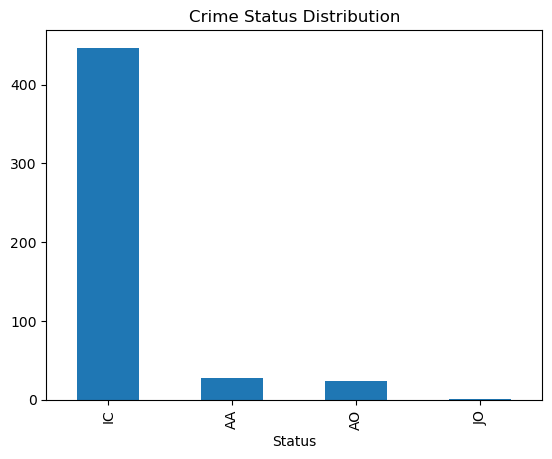

In [31]:
status_counts = df['Status'].value_counts()
status_counts.plot(kind='bar', title='Crime Status Distribution')
plt.show()